In [9]:
import os
from dotenv import load_dotenv
import sys

load_dotenv()

lib_dir = os.environ.get("LOCAL_LIB_DIR")
sys.path.append(lib_dir)

data_dir_airfoil = os.environ.get("LOCAL_DATA_DIR_AIRFOIL")
model_dir_airfoil = os.path.join(data_dir_airfoil, "models")

import torch
import yaml
from airfoil_pinn import AirfoilPINN
from naca4digit_airfoil import Naca4DigitAirfoil
import utils
import matplotlib.pyplot as plt

import csv
import pandas as pd

import matplotlib.pyplot as plt

In [10]:
pressure_data = pd.read_csv(os.path.join(data_dir_airfoil, "pressure.csv"))

In [11]:
# Define airfoil parameters (example: NACA 2412)
chord = 1.0
m = 0.02  # maximum camber
p = 0.4   # position of maximum camber
t = 0.12  # maximum thickness
num_points = 100
angle_of_attack = 10

airfoil = Naca4DigitAirfoil(chord, m, p, t, alpha_deg=angle_of_attack)

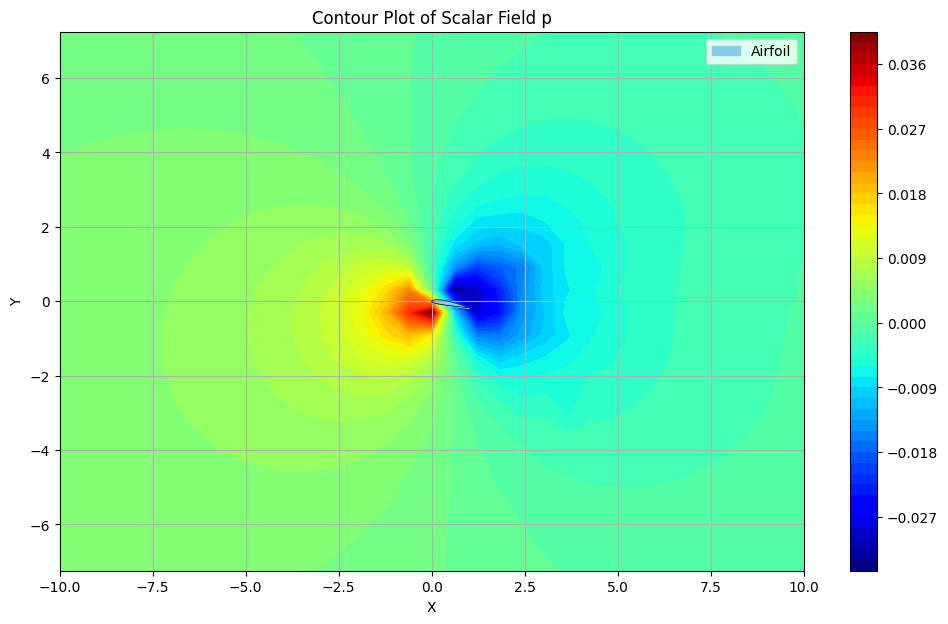

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Assuming df has columns 'x', 'y', and 'p'
x = pressure_data['x']
y = pressure_data['y']
p = pressure_data['p']

# Create a grid to interpolate your data.
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
Xi, Yi = np.meshgrid(xi, yi)

# Interpolate p values onto the grid
Pi = griddata((x, y), p, (Xi, Yi), method='linear')

# Generate the contour plot
fig, ax = plt.subplots(figsize=(12, 7))
contour = ax.contourf(Xi, Yi, Pi, levels=50, cmap='jet')
airfoil.plot(ax)
fig.colorbar(contour, ax=ax)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Contour Plot of Scalar Field p')
ax.set_xlim(-10, 10)
ax.set_ylim(-5, 5)
plt.show()

In [13]:
x_airfoil, y_airfoil = airfoil.get_coords()

In [14]:
p_airfoil = griddata((x, y), p, (x_airfoil, y_airfoil), method='linear')

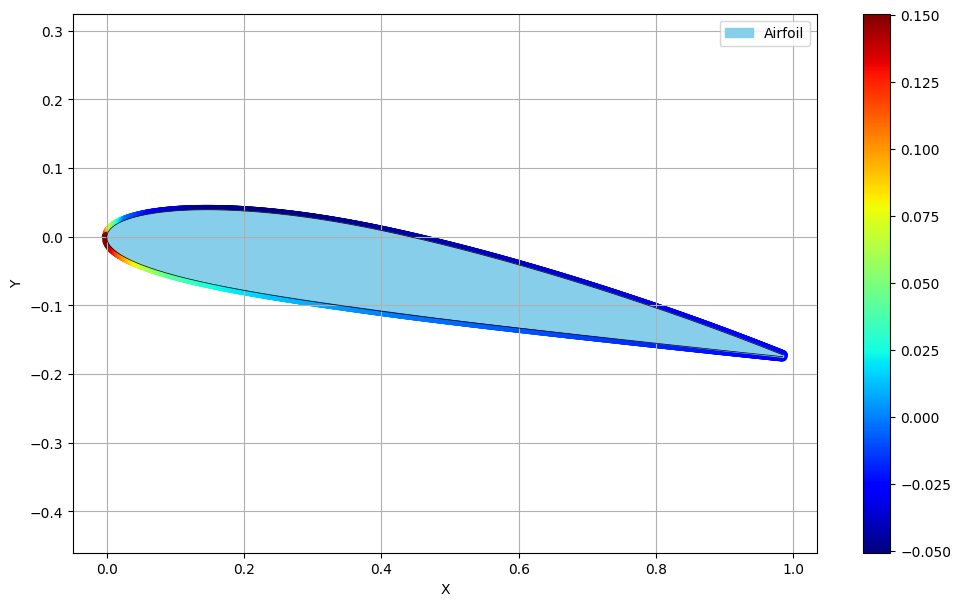

In [15]:
# Generate the contour plot
fig, ax = plt.subplots(figsize=(12, 7))
scatter = ax.scatter(x_airfoil, y_airfoil, c=p_airfoil, cmap='jet')
airfoil.plot(ax)
fig.colorbar(scatter, ax=ax)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In [16]:
data = np.array([x_airfoil, y_airfoil, p_airfoil]).T
df = pd.DataFrame(data, columns=['x', 'y', 'p'])
df.to_csv(os.path.join(data_dir_airfoil, "p_data.csv"), index=False)